# Ocean station Papa

This notebook checks the sensitivity of the Langmuir turbulence parameterizations in CVMix to the Stokes drift in the [ocean station Papa](https://www.pmel.noaa.gov/ocs/Papa) case.

In [1]:
import sys
import numpy as np
import string
import matplotlib.pyplot as plt
# add the path of gotmtool
sys.path.append("../gotmtool")
from gotmtool import *
from gotmtool.diags import get_mld_deltaT

## Load data

First, store the information of the four simulations into lists and dictionaries.

In [2]:
casenames = [
    'KPP-CVMix',
    'KPPLT-VR12',
    'KPPLT-LF17',
    ]

colors = {
    'KPP-CVMix': 'tab:olive',
    'KPPLT-VR12': 'tab:orange',
    'KPPLT-LF17': 'tab:red',
    }

rundates = {
    '2012-03-21': '2012-05-21',
    '2012-05-21': '2012-08-21',
    '2012-08-21': '2013-01-12',
    '2013-01-12': '2013-03-21',
    }

casedir1 = '../gotm/run/OSPapa'
casedir2 = '../gotm/run/OSPapa_theory_wave'
casedir3 = '../gotm/run/OSPapa_const_La'
save_fig = True

Load data for the four simulations and four stages into a dictionary.

In [3]:
def load_data(casedir, casenames):
    sims = {}
    dataset = {}
    for case in casenames:
        sims0 = {}
        dataset0 = {}
        for start in rundates.keys():
            end = rundates[start]
            sim = Simulation(path=casedir+'/'+case+'_'+start+'_'+end)
            sims0[start] = sim
            dataset0[start] = sim.load_data()
        sims[case] = sims0
        dataset[case] = dataset0
    return sims, dataset


In [4]:
sims1, dataset1 = load_data(casedir1, casenames)
sims2, dataset2 = load_data(casedir2, casenames)
sims3, dataset3 = load_data(casedir3, casenames)

## Figure

Time series of (a) La$_t^{-2}$ where La$_t$ is the turbulent Langmuir number, (b) La$_\mathrm{SL}^{-2}$ where La$_\mathrm{SL}$ is the surface layer averaged Langmuir number, (c) sea surface temperature (SST; $^\circ$C), (d) sea surface salinity (SSS; g kg$^{-1}$) and (e) mixed layer depth (MLD; m) defined by a temperature threshold method. Dashed lines show the results with Stokes drift estimated from the "theory wave" approach. Dotted lines show the results with the idealized exponential Stokes drift.

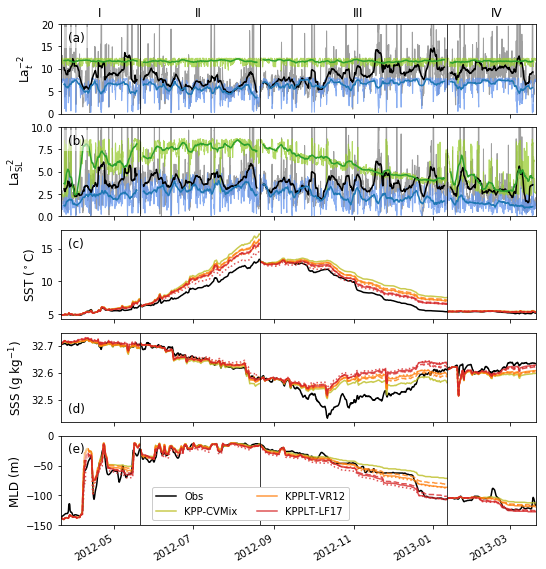

In [5]:
fig, axarr = plt.subplots(5,sharex='col')
fig.set_size_inches([8,8])
for i, start in enumerate(rundates.keys()):
    
    data1    = dataset1['KPP-CVMix'][start]
    data2    = dataset2['KPP-CVMix'][start]
    data3    = dataset3['KPP-CVMix'][start]
    laturb1  = data1.La_Turb[:,0,0]
    laturb2  = data2.La_Turb[:,0,0]
    laturb3  = data3.La_Turb[:,0,0]
    laturb1  = laturb1.where(laturb1 < 1.e3, drop=True)
    laturb2  = laturb2.where(laturb2 < 1.e3, drop=True)
    laturb3  = laturb3.where(laturb3 < 1.e3, drop=True)
    lasl1  = data1.La_SL[:,0,0]
    lasl2  = data2.La_SL[:,0,0]
    lasl3  = data3.La_SL[:,0,0]
    lasl1  = lasl1.where(lasl1 < 1.e3, drop=True)
    lasl2  = lasl2.where(lasl2 < 1.e3, drop=True)
    lasl3  = lasl3.where(lasl2 < 1.e3, drop=True)
    
    (laturb1**(-2)).plot(ax=axarr[0], color='gray', linewidth=1, alpha=0.75)
    (laturb2**(-2)).plot(ax=axarr[0], color='cornflowerblue', linewidth=1, alpha=0.75)
    (laturb3**(-2)).plot(ax=axarr[0], color='yellowgreen', linewidth=1, alpha=0.75)
    (laturb1**(-2)).rolling(time=40, center=True).mean().plot(
        ax=axarr[0], color='k', linewidth=1.5)
    (laturb2**(-2)).rolling(time=40, center=True).mean().plot(
        ax=axarr[0], color='tab:blue', linewidth=1.5)
    (laturb3**(-2)).rolling(time=40, center=True).mean().plot(
        ax=axarr[0], color='tab:green', linewidth=1.5)
    
    
    (lasl1**(-2)).plot(ax=axarr[1], color='gray', linewidth=1, alpha=0.75)
    (lasl2**(-2)).plot(ax=axarr[1], color='cornflowerblue', linewidth=1, alpha=0.75)
    (lasl3**(-2)).plot(ax=axarr[1], color='yellowgreen', linewidth=1, alpha=0.75)
    (lasl1**(-2)).rolling(time=40, center=True).mean().plot(
        ax=axarr[1], color='k', linewidth=1.5)
    (lasl2**(-2)).rolling(time=40, center=True).mean().plot(
        ax=axarr[1], color='tab:blue', linewidth=1.5)
    (lasl3**(-2)).rolling(time=40, center=True).mean().plot(
        ax=axarr[1], color='tab:green', linewidth=1.5)
    
    data    = dataset1['KPP-CVMix'][start]
    if i == 0:
        label = 'Obs'
    else:
        label = None
    sst_obs = data.sst_obs
    sst_obs.rolling(time=8, center=True).mean().plot(
        ax=axarr[2], color='k', linewidth=1.5)
    sss_obs = data.sss
    sss_obs.rolling(time=8, center=True).mean().plot(
        ax=axarr[3], color='k', linewidth=1.5)
    
    mld_obs = -get_mld_deltaT(data.temp_obs[:,:,0,0])
    mld_obs.rolling(time=8, center=True).mean().plot(
        ax=axarr[4], color='k', linewidth=1.5, label=label)
    
    for case in casenames:
        if i == 0:
            label = case
        else:
            label = None
        temp = dataset1[case][start].temp
        temp[-1,:,0,0].rolling(time=8, center=True).mean().plot(
            ax=axarr[2], color=colors[case], linewidth=1.5, alpha=0.8)
        
        salt = dataset1[case][start].salt
        salt[-1,:,0,0].rolling(time=8, center=True).mean().plot(
            ax=axarr[3], color=colors[case], linewidth=1.5, alpha=0.8)
        
        mld = -get_mld_deltaT(temp[:,:,0,0])
        mld.rolling(time=8, center=True).mean().plot(
            ax=axarr[4], color=colors[case], linewidth=1.5, alpha=0.8, label=label)
    
        if case != 'KPP-CVMix':
            temp = dataset2[case][start].temp
            temp[-1,:,0,0].rolling(time=8, center=True).mean().plot(
                ax=axarr[2], color=colors[case], linewidth=1.5, linestyle='--', alpha=0.8)

            salt = dataset2[case][start].salt
            salt[-1,:,0,0].rolling(time=8, center=True).mean().plot(
                ax=axarr[3], color=colors[case], linewidth=1.5, linestyle='--', alpha=0.8)

            mld = -get_mld_deltaT(temp[:,:,0,0])
            mld.rolling(time=8, center=True).mean().plot(
                ax=axarr[4], color=colors[case], linewidth=1.5, linestyle='--', alpha=0.8)
            
            temp = dataset3[case][start].temp
            temp[-1,:,0,0].rolling(time=8, center=True).mean().plot(
                ax=axarr[2], color=colors[case], linewidth=1.5, linestyle=':', alpha=0.8)
            
            salt = dataset3[case][start].salt
            salt[-1,:,0,0].rolling(time=8, center=True).mean().plot(
                ax=axarr[3], color=colors[case], linewidth=1.5, linestyle=':', alpha=0.8)
            
            mld = -get_mld_deltaT(temp[:,:,0,0])
            mld.rolling(time=8, center=True).mean().plot(
                ax=axarr[4], color=colors[case], linewidth=1.5, linestyle=':', alpha=0.8)
    
axarr[4].legend(loc = 'lower center', fontsize=10, ncol=2,
                bbox_to_anchor=(0.4, 0.0), framealpha=1)

axarr[0].set_ylim([0,20])
axarr[1].set_ylim([0,10])
axarr[0].set_ylabel('La$_t^{-2}$', fontsize=12)
axarr[1].set_ylabel('La$_\mathrm{SL}^{-2}$', fontsize=12)
axarr[2].set_ylabel('SST ($^\circ$C)', fontsize=12)
axarr[3].set_ylabel('SSS (g kg$^{-1}$)', fontsize=12)
axarr[4].set_ylim([-150, 0])
axarr[4].set_ylabel('MLD (m)', fontsize=12)

startdate = list(rundates.keys())
for i, ax in enumerate(axarr):
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_xlim([np.datetime64('2012-03-21'), np.datetime64('2013-03-21')])
    ax.axvline(np.datetime64(startdate[1]), color='k', linewidth=0.75)
    ax.axvline(np.datetime64(startdate[2]), color='k', linewidth=0.75)
    ax.axvline(np.datetime64(startdate[3]), color='k', linewidth=0.75)
    if i == 3:
        ax.text(0.015, 0.08, '('+string.ascii_lowercase[i]+')', transform=ax.transAxes,
                bbox=dict(facecolor='w', edgecolor='none', alpha=0.5),
                fontsize=12, va='bottom')
    else:
        ax.text(0.015, 0.92, '('+string.ascii_lowercase[i]+')', transform=ax.transAxes,
                bbox=dict(facecolor='w', edgecolor='none', alpha=0.5),
                fontsize=12, va='top')
    
axarr[0].text(0.083, 1.05, 'I', transform=axarr[0].transAxes,
              fontsize=12, va='bottom', ha='center')
axarr[0].text(0.29, 1.05, 'II', transform=axarr[0].transAxes,
              fontsize=12, va='bottom', ha='center')
axarr[0].text(0.625, 1.05, 'III', transform=axarr[0].transAxes,
              fontsize=12, va='bottom', ha='center')
axarr[0].text(0.917, 1.05, 'IV', transform=axarr[0].transAxes,
              fontsize=12, va='bottom', ha='center')

if save_fig:
    plt.subplots_adjust(top=0.95, bottom=0.08, right=0.95, hspace=0.15)
    figname = 'ospapa_ts_stokes.pdf'
    fig.savefig(figname, dpi=300)